In [1]:
!pip install trustpilot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from trustpilot import client
import pandas as pd
from pandas import json_normalize
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import re
from datetime import datetime
import matplotlib.pyplot as plt
import requests

# pd.set_option('display.max_colwidth', None)
#   

In [4]:
client.default_session.setup(
    api_host="https://api.trustpilot.com",
    api_key='VD4VHCNaU9y11dIYSx0tyaicAZFrJ56r',
    api_version='v1'
)



In [5]:
#611

In [6]:
# flag= False
# page=1
# while page< 5:
  
#   response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page={page}')
#   status_code= response.status_code

#   data=response.json()
#   reviews=data['reviews']
#   df=pd.json_normalize(reviews)
#   flag=df.empty
#   print(page)
#   page=+1

In [7]:
# flag= False
page=1
response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page=1')
status_code= response.status_code

data=response.json()
reviews=data['reviews']
df=pd.json_normalize(reviews)

for p in range(2,1000):
  response=client.get(f'https://api.trustpilot.com/v1/business-units/4beee7db00006400050be98b/reviews?page={p}')
  status_code= response.status_code

  data=response.json()
  reviews=data['reviews']
  df_new=pd.json_normalize(reviews)
  # flag=df.empty
  # print(p)
  # print(flag)
  if df_new.empty:
    break
  df=df.append(df_new, ignore_index=True)
  


In [8]:
df

,links,id,location,stars,title,text,language,createdAt,experiencedAt,updatedAt,...,consumer.id,consumer.displayName,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,invitation
0,[{'href': 'https://api.trustpilot.com/v1/revie...,62f02ba48000af4a88578d03,None,5,Had an issue on my account so rang AXA,Had an issue on my account so rang AXA. It to...,en,2022-08-07T23:16:20Z,None,None,...,58168d7c0000ff000a527fb2,mattnaylor,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
1,[{'href': 'https://api.trustpilot.com/v1/revie...,62f010484c35e69ec5264282,None,1,Terrible costumer service,Terrible costumer service\nNever really sorted...,en,2022-08-07T21:19:36Z,None,None,...,60be22c335fa1b00191cc1d4,Jorge,None,4,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,NaN
2,[{'href': 'https://api.trustpilot.com/v1/revie...,62eff8954c35e69ec5262fe4,None,5,A very good online service and a quote,A very good online service and a quote. \nWill...,en,2022-08-07T19:38:29Z,None,None,...,5ac3b2394de5666d34aa4166,Damayanti Yogeshkumar Patel,None,5,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
3,[{'href': 'https://api.trustpilot.com/v1/revie...,62efc52d4c35e69ec526070d,None,5,87 Year-old well satisfied Customer!,At 87 years of age with a lifetime of claim fr...,en,2022-08-07T15:59:09Z,None,None,...,5964a1920000ff000aade71e,Mr David James,"Tipton, GB",5,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
4,[{'href': 'https://api.trustpilot.com/v1/revie...,62eefa1c8000af4a8856e453,None,5,good,good services,en,2022-08-07T01:32:44Z,None,None,...,61130e6e5b450000128ba126,Siulun,None,2,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,[{'href': 'https://api.trustpilot.com/v1/revie...,525f916b00006400025f885d,None,4,very good!,very good insurance company !,en,2013-10-17T07:27:39Z,None,None,...,525fad27000064000150ca26,daniel Zimmerman,None,4,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,None
12323,[{'href': 'https://api.trustpilot.com/v1/revie...,50f05f68000064000234f17f,None,5,Did exactly as promised...brilliant insurance,After a burst pipe damaged our home in Novembe...,en,2013-01-11T18:52:24Z,None,None,...,50f05f6500006400012d16de,Barbara Jackson,None,11,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,None
12324,[{'href': 'https://api.trustpilot.com/v1/revie...,5033f9970000640002259133,None,3,good service but poor quote,had two years home insurance with AXA - had g...,en,2012-08-21T21:11:51Z,None,None,...,4f7b44fe0000640001170591,ewan davidson,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,None
12325,[{'href': 'https://api.trustpilot.com/v1/revie...,4fe1fec5000064000220921d,None,5,"Went there for a cheap premium, will stay foll...",I went to AXA last year for buildings and cont...,en,2012-06-20T16:48:05Z,None,None,...,4fd7298d00006400011b09d9,Michael Hughes,None,18,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,None


In [9]:
df.columns

Index(['links', 'id', 'location', 'stars', 'title', 'text', 'language',
       'createdAt', 'experiencedAt', 'updatedAt', 'companyReply', 'isVerified',
       'source', 'numberOfLikes', 'status', 'reportData', 'complianceLabels',
       'countsTowardsTrustScore', 'countsTowardsLocationTrustScore',
       'businessUnitHistory', 'reviewVerificationLevel', 'consumer.links',
       'consumer.id', 'consumer.displayName', 'consumer.displayLocation',
       'consumer.numberOfReviews', 'businessUnit.links', 'businessUnit.id',
       'businessUnit.identifyingName', 'businessUnit.displayName',
       'invitation.businessUnitId', 'invitation'],
      dtype='object')

### Cleaning the df a little

In [10]:
### 'complianceLabels', 'businessUnitHistory' can contain empty lists and cause errors with unique()



In [11]:
df.drop(['complianceLabels', 'businessUnitHistory'], axis=1,inplace=True)

In [12]:
df.columns

Index(['links', 'id', 'location', 'stars', 'title', 'text', 'language',
       'createdAt', 'experiencedAt', 'updatedAt', 'companyReply', 'isVerified',
       'source', 'numberOfLikes', 'status', 'reportData',
       'countsTowardsTrustScore', 'countsTowardsLocationTrustScore',
       'reviewVerificationLevel', 'consumer.links', 'consumer.id',
       'consumer.displayName', 'consumer.displayLocation',
       'consumer.numberOfReviews', 'businessUnit.links', 'businessUnit.id',
       'businessUnit.identifyingName', 'businessUnit.displayName',
       'invitation.businessUnitId', 'invitation'],
      dtype='object')

In [98]:
#useless columns location, companyReply, reportData, countsTowardsLocationTrustScore, invitation
#Check useful columns on by one
df['source'].unique()

array(['FileUploadInvitation', 'Organic', 'BasicLink', 'Trustpilot'],
      dtype=object)

In [14]:
df.drop(['location', 'companyReply', 'reportData', 'countsTowardsLocationTrustScore', 'invitation'], axis=1,inplace=True)

In [15]:
df.columns

Index(['links', 'id', 'stars', 'title', 'text', 'language', 'createdAt',
       'experiencedAt', 'updatedAt', 'isVerified', 'source', 'numberOfLikes',
       'status', 'countsTowardsTrustScore', 'reviewVerificationLevel',
       'consumer.links', 'consumer.id', 'consumer.displayName',
       'consumer.displayLocation', 'consumer.numberOfReviews',
       'businessUnit.links', 'businessUnit.id', 'businessUnit.identifyingName',
       'businessUnit.displayName', 'invitation.businessUnitId'],
      dtype='object')

### Cleaning the dates

In [16]:
# time_string=df['createdAt'][0]

In [17]:

# df['time_string_regex']=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", df['createdAt'])
df['time_string_regex']=  df['createdAt'].apply(lambda x:  re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", x))
df['date']=df['time_string_regex'].apply(lambda x:  datetime.fromisoformat(x[0]))    

In [18]:
df.head(2)

,links,id,stars,title,text,language,createdAt,experiencedAt,updatedAt,isVerified,...,consumer.displayName,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,time_string_regex,date
0,[{'href': 'https://api.trustpilot.com/v1/revie...,62f02ba48000af4a88578d03,5,Had an issue on my account so rang AXA,Had an issue on my account so rang AXA. It to...,en,2022-08-07T23:16:20Z,None,None,True,...,mattnaylor,None,7,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,4beee7db00006400050be98b,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-07
1,[{'href': 'https://api.trustpilot.com/v1/revie...,62f010484c35e69ec5264282,1,Terrible costumer service,Terrible costumer service\nNever really sorted...,en,2022-08-07T21:19:36Z,None,None,False,...,Jorge,None,4,[{'href': 'https://api.trustpilot.com/v1/busin...,4beee7db00006400050be98b,www.axa.co.uk,AXA UK Car and Home,NaN,"<re.Match object; span=(0, 10), match='2022-08...",2022-08-07


### Grouping dataframe by day, week and month

In [19]:
df_by_day=df.groupby('date').count()[['id', 'links']]
df_by_day['date']=df_by_day.index
df_by_day['ranking']=df.groupby('date').mean()['stars']
df_by_day

,id,links,date,ranking
date,,,,
2011-07-19,1,1,2011-07-19,5.000000
2012-06-20,1,1,2012-06-20,5.000000
2012-08-21,1,1,2012-08-21,3.000000
2013-01-11,1,1,2013-01-11,5.000000
2013-10-17,1,1,2013-10-17,4.000000
...,...,...,...,...
2022-08-03,6,6,2022-08-03,5.000000
2022-08-04,3,3,2022-08-04,2.333333
2022-08-05,85,85,2022-08-05,4.376471


In [20]:
df_by_week=df_by_day.groupby([pd.Grouper(key='date', freq='w')]).sum()
df_by_week['ranking/7']=df_by_week['ranking']/7
df_by_week

,id,links,ranking,ranking/7
date,,,,
2011-07-24,1,1,5.000000,0.714286
2011-07-31,0,0,0.000000,0.000000
2011-08-07,0,0,0.000000,0.000000
2011-08-14,0,0,0.000000,0.000000
2011-08-21,0,0,0.000000,0.000000
...,...,...,...,...
2022-07-10,187,187,30.807104,4.401015
2022-07-17,165,165,26.306838,3.758120
2022-07-24,163,163,30.924475,4.417782


In [21]:
df_by_month=df_by_day.groupby([pd.Grouper(key='date', freq='M')]).sum()
df_by_month['ranking/30']=df_by_month['ranking']/30
df_by_month

,id,links,ranking,ranking/30
date,,,,
2011-07-31,1,1,5.000000,0.166667
2011-08-31,0,0,0.000000,0.000000
2011-09-30,0,0,0.000000,0.000000
2011-10-31,0,0,0.000000,0.000000
2011-11-30,0,0,0.000000,0.000000
...,...,...,...,...
2022-04-30,411,411,111.093465,3.703116
2022-05-31,464,464,117.223496,3.907450
2022-06-30,434,434,114.142566,3.804752


In [76]:
df_by_month[df_by_month['ranking/30']>3]

,id,links,ranking,ranking/30
date,,,,
2020-01-31,261,261,103.095129,3.436504
2020-02-29,381,381,104.381297,3.479377
2020-03-31,197,197,103.374081,3.445803
2020-05-31,268,268,94.390096,3.146337
2020-06-30,340,340,97.250804,3.241693
2020-07-31,238,238,95.464558,3.182152
2020-10-31,273,273,102.170094,3.405670
2020-11-30,369,369,111.293201,3.709773
2020-12-31,591,591,114.493837,3.816461


### Checking review's behaviour through time 

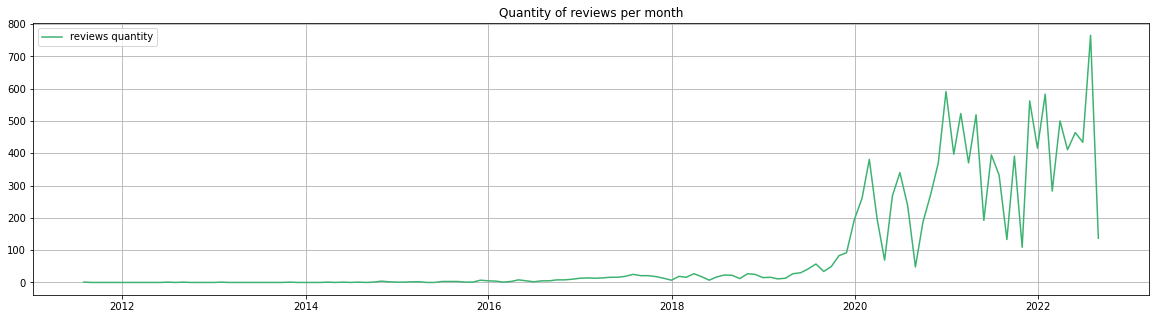

In [23]:

plt.figure(figsize=(20, 5))
plt.plot(df_by_month['id'], label='reviews quantity', color='mediumseagreen')
# plt.plot(df_by_month['ranking/30'], label='rating', color='purple')
plt.legend()
plt.title('Quantity of reviews per month')
plt.grid()
plt.show()




## Checking reviews and rating behaviour through time

Ignored 2012 to 2017 the quantity of reviews was too little

In [24]:
#Use pd.Timestamp to filter by date!!!!
#df_by_month[df_by_month.index> pd.Timestamp(2018,1,1)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


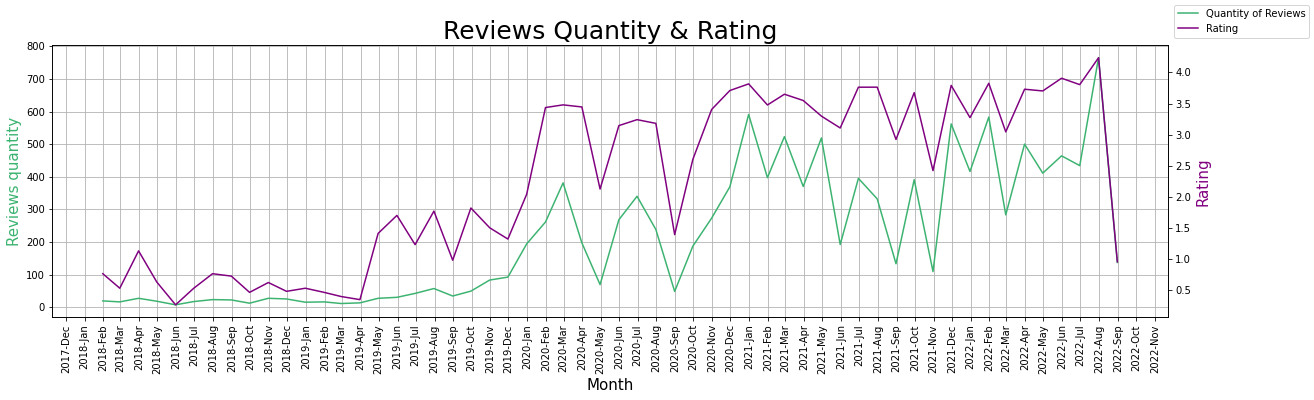

In [25]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as mdates


fig =plt.figure(figsize=(20, 5))
plt.grid()
ax1 = plt.subplot()
l1 = ax1.plot(df_by_month[df_by_month.index> pd.Timestamp(2018,1,1)]['id'], label='Quantity of Reviews', color='mediumseagreen')
ax2 = ax1.twinx()
l2 = ax2.plot(df_by_month[df_by_month.index> pd.Timestamp(2018,1,1)]['ranking/30'], label='Rating', color='purple')
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Reviews quantity', color='mediumseagreen', fontsize=15)
ax2.set_ylabel('Rating', color='purple', fontsize=15)
plt.title('Reviews Quantity & Rating', fontsize=25)
fig.legend(loc="upper right")



dtFmt = mdates.DateFormatter('%Y-%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) 
# show every 12th tick on x axes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_tick_params(rotation=90)

plt.show()

## Segmentando por invitacion

In [26]:
df.columns

Index(['links', 'id', 'stars', 'title', 'text', 'language', 'createdAt',
       'experiencedAt', 'updatedAt', 'isVerified', 'source', 'numberOfLikes',
       'status', 'countsTowardsTrustScore', 'reviewVerificationLevel',
       'consumer.links', 'consumer.id', 'consumer.displayName',
       'consumer.displayLocation', 'consumer.numberOfReviews',
       'businessUnit.links', 'businessUnit.id', 'businessUnit.identifyingName',
       'businessUnit.displayName', 'invitation.businessUnitId',
       'time_string_regex', 'date'],
      dtype='object')

In [85]:
df[df['source']=='Organic'].groupby('stars').count()

,links,id,title,text,language,createdAt,experiencedAt,updatedAt,isVerified,source,...,consumer.displayName,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,time_string_regex,date
stars,,,,,,,,,,,,,,,,,,,,,
1,1524,1524,1524,1524,1524,1524,6,179,1524,1524,...,1524,47,1524,1524,1524,1524,1524,0,1524,1524
2,53,53,53,53,53,53,0,9,53,53,...,53,2,53,53,53,53,53,0,53,53
3,45,45,45,45,45,45,0,5,45,45,...,45,3,45,45,45,45,45,0,45,45
4,71,71,71,71,71,71,0,4,71,71,...,71,0,71,71,71,71,71,0,71,71
5,632,632,632,632,632,632,1,18,632,632,...,632,8,632,632,632,632,632,0,632,632


In [99]:
df_Invitation_count=df[df['source']=='FileUploadInvitation'].groupby('stars').count()
df_Invitation_count['stars']=df_Invitation_count.index
df_Invitation_count.head()

,links,id,title,text,language,createdAt,experiencedAt,updatedAt,isVerified,source,...,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,time_string_regex,date,stars
stars,,,,,,,,,,,,,,,,,,,,,
1,559,559,559,559,559,559,0,22,559,559,...,5,559,559,559,559,559,559,559,559,1
2,152,152,152,152,152,152,0,6,152,152,...,0,152,152,152,152,152,152,152,152,2
3,249,249,249,249,249,249,0,6,249,249,...,3,249,249,249,249,249,249,249,249,3
4,1018,1018,1018,1018,1018,1018,2,12,1018,1018,...,6,1018,1018,1018,1018,1018,1018,1018,1018,4
5,7821,7821,7821,7821,7821,7821,1,94,7821,7821,...,67,7821,7821,7821,7821,7821,7821,7821,7821,5


In [109]:
fig = px.bar(df_Invitation_count, x='stars', y="links", labels={
                     "stars": "Rating",
                     "links": "Quantity of reviews"
                     
                 },
                title="Invited reviews rating")
fig.update_layout(title_x=0.5)

fig.show()

In [92]:
df_organic_count=df[df['source']=='Organic'].groupby('stars').count()
df_organic_count['stars']=df_organic_count.index
df_organic_count.head()

,links,id,title,text,language,createdAt,experiencedAt,updatedAt,isVerified,source,...,consumer.displayLocation,consumer.numberOfReviews,businessUnit.links,businessUnit.id,businessUnit.identifyingName,businessUnit.displayName,invitation.businessUnitId,time_string_regex,date,stars
stars,,,,,,,,,,,,,,,,,,,,,
1,1524,1524,1524,1524,1524,1524,6,179,1524,1524,...,47,1524,1524,1524,1524,1524,0,1524,1524,1
2,53,53,53,53,53,53,0,9,53,53,...,2,53,53,53,53,53,0,53,53,2
3,45,45,45,45,45,45,0,5,45,45,...,3,45,45,45,45,45,0,45,45,3
4,71,71,71,71,71,71,0,4,71,71,...,0,71,71,71,71,71,0,71,71,4
5,632,632,632,632,632,632,1,18,632,632,...,8,632,632,632,632,632,0,632,632,5


In [108]:
#Ignoring 5 star reviews
#df_Org=df[df['source']== 'Organic' ][['source','stars']]

fig = px.bar(df_organic_count, x='stars', y="links", labels={
                     "stars": "Rating",
                     "links": "Quantity of reviews"
                     
                 },
                title="Organic reviews rating")
fig.update_layout(title_x=0.5)

fig.show()

In [56]:
df_1star=df[(df['stars']==1) & (df['source']=='Organic' )][['title','consumer.displayName', 'text','source','date']]
df_1star=df_1star[df_1star['date']>  pd.Timestamp(2021,12,31) ][['title','consumer.displayName', 'text','source','date']]
df_1star.head(20)

,title,consumer.displayName,text,source,date
1,Terrible costumer service,Jorge,Terrible costumer service\nNever really sorted...,Organic,2022-08-07
71,Please avoid this company,Mr Martin c,Please avoid this company. we had an accident ...,Organic,2022-08-05
113,key cover con,duncan perham,"have key cover, dropped my key, it broke somet...",Organic,2022-08-05
114,Absolutely the worst service we have…,Mr paget,Absolutely the worst service we have ever had ...,Organic,2022-08-04
115,AVOID LIKE THE PLAGUE,Lee Snape,AVOID. CAN'T EVER GET HOLD OF THEM. AWFUL COMM...,Organic,2022-08-04
124,AVOID THIS INSURER,Jacqueline Farrell,AVOID THIS INSURER. They go back on their word...,Organic,2022-08-02
126,A dear friend of mine has had health,keith hargreaves,"A dear friend of mine has had health, car and...",Organic,2022-08-02
131,Don’t ever use this company!!!!,Mrs Karen Peck,Don’t ever use this company!!!!! \nBought trav...,Organic,2022-08-01
147,Useless emergency policy,Martin Bingle,Bought emergency cover for plumbing and drains...,Organic,2022-07-30
183,Shocking company,jason hill,One of their policyholders hit my sons car in ...,Organic,2022-07-29


In [127]:
df_1star[df_1star['consumer.displayName']=='Robert']

,title,consumer.displayName,text,source,date,number
424,I honestly wish I had never got involved with ...,Robert,You only really know how good an insurance com...,Organic,2022-07-19,You only really know how good an insurance com...


In [134]:
import pandas_gbq as gbq

In [73]:
import re
df_1star['number'] =  df_1star['text'].apply(lambda x: re.search(r'[1-9]','', str(x)))

TypeError: ignored

In [68]:
df_1star

,title,consumer.displayName,text,source,date,number
1,Terrible costumer service,Jorge,Terrible costumer service\nNever really sorted...,Organic,2022-08-07,Terrible costumer service\nNever really sorted...
71,Please avoid this company,Mr Martin c,Please avoid this company. we had an accident ...,Organic,2022-08-05,Please avoid this company. we had an accident ...
113,key cover con,duncan perham,"have key cover, dropped my key, it broke somet...",Organic,2022-08-05,"have key cover, dropped my key, it broke somet..."
114,Absolutely the worst service we have…,Mr paget,Absolutely the worst service we have ever had ...,Organic,2022-08-04,Absolutely the worst service we have ever had ...
115,AVOID LIKE THE PLAGUE,Lee Snape,AVOID. CAN'T EVER GET HOLD OF THEM. AWFUL COMM...,Organic,2022-08-04,AVOID. CAN'T EVER GET HOLD OF THEM. AWFUL COMM...
...,...,...,...,...,...,...
3412,Would be 0 star if possible,Sarah Crook,Would be 0 star if possible. Claim raised in S...,Organic,2022-01-10,Would be 0 star if possible. Claim raised in S...
3570,Don't give you what they offer,Joe,Chose this company as they offered cashback bu...,Organic,2022-01-06,Chose this company as they offered cashback bu...
3571,Extremely poorly run company when it…,Robert Burton,Extremely poorly run company when it comes to ...,Organic,2022-01-06,Extremely poorly run company when it comes to ...
3574,Miore than doubled my house insurance,Col McD,Miore than doubled my house insurance over a p...,Organic,2022-01-03,Miore than doubled my house insurance over a p...


In [55]:
num=1
for rev in df_1star['text']:

  print(num)
  print(rev)
  print('-----')
  num+=1

1
Terrible costumer service
Never really sorted my problem
I wasn’t at fault in the accident and AXA wasn’t even able to sort out my issue, got no compensation when I was injured and had to to stay at home for 2 weeks, missing work, and every time I called I had to repeat the story over and over again. 

Never done anything that seemed helpful and at the end of the day, I had no curtesy car, my insurance was as cancelled even though I wasn’t at fault.. just terrible man.
-----
2
Please avoid this company. we had an accident on the motorway, took over an hour to get in touch with anyone. After care was very poor and ended up doing all the ringing round for the company to get my car repair arranged. 

you need a caring company when your in a awful situation like that and they failed us. 

I will never use again and I advise others to do the same.
-----
3
have key cover, dropped my key, it broke something inside the key. Called brake down, they gave me local number to call and said I was 

In [51]:
df_1star.to_csv('df_1star.csv')

###check consumers
df['consumer.links'][3]

it can contain interesting information. Links include images

In [29]:
df[df['source']=='Organic'][['source', 'consumer.links', 'consumer.id']]

,source,consumer.links,consumer.id
1,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,60be22c335fa1b00191cc1d4
48,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5313b844000064000166c410
71,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,62ed10590f3d3300128112ef
113,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5db3804bec39895a42155504
114,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,585157d00000ff000a61a675
...,...,...,...
12145,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,5923576d0000ff000a9b4204
12146,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,55b7e1ed0000ff0001cffbf8
12147,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,591ca6330000ff000a997887
12148,Organic,[{'href': 'https://api.trustpilot.com/v1/consu...,536d025a0000640001729e85


In [30]:
df[df['source']!='Organic'].iloc[0]

links                           [{'href': 'https://api.trustpilot.com/v1/revie...
id                                                       62f02ba48000af4a88578d03
stars                                                                           5
title                                      Had an issue on my account so rang AXA
text                            Had an issue on my account so rang AXA.  It to...
language                                                                       en
createdAt                                                    2022-08-07T23:16:20Z
experiencedAt                                                                None
updatedAt                                                                    None
isVerified                                                                   True
source                                                       FileUploadInvitation
numberOfLikes                                                                   0
status          